In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [4]:
train_data = unpickle('cifar-100-python/train')
test_data = unpickle('cifar-100-python/test')
labels = unpickle('cifar-100-python/meta')
interesting_coarse_labels = [0, 1] # Aquatic mammals and Fish

Hello world!!!!!


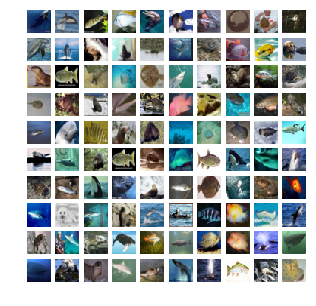

In [5]:
train = []
y = []
test = []
y_test = []
for i in range(len(train_data[b'coarse_labels'])):
    for j in interesting_coarse_labels:
        if train_data[b'coarse_labels'][i] == j:
            train.append(train_data[b'data'][i])
            y.append(j)
            break

for i in range(len(test_data[b'coarse_labels'])):
    for j in interesting_coarse_labels:
        if test_data[b'coarse_labels'][i] == j:
            test.append(test_data[b'data'][i])
            y_test.append(j)
            break
        
train = np.array(train)
y = np.array(y)
test = np.array(test)
y_test = np.array(y_test)
train_reshaped = train.reshape(-1, 3, 32, 32).transpose(0,2,3,1)
test_reshaped = test.reshape(-1, 3, 32, 32).transpose(0,2,3,1)
print("Hello world!!!!!")

#Visualizing CIFAR 100
fig, axes = plt.subplots(10,10,figsize=(5,5))
for j in range(10):
    for k in range(10):
        i = np.random.choice(range(len(train_reshaped)))
        axes[j][k].set_axis_off()
        axes[j][k].imshow(train_reshaped[i:i+1][0])

In [6]:
import sys
import numpy as np

class NearestNeighbour:
    def __init__(self, k=1):
        self.k = k
    
    def train(self, X, y):
        self.X = X
        self.y = y
    
    def predict(self, x_test):
#         min_train_index = -1
#         min_diff = sys.maxsize
#         for i in range(len(self.X)):
#             diff = np.sum(np.abs(x_test - self.X))
#             if diff < min_diff:
#                 min_train_index = i
#                 min_diff = diff
#         return self.y[i]
#        index = np.argmin(np.sum(np.abs(self.X - x_test), axis = (1, 2, 3)))
#        return self.y[index]
        sorted_indexes = np.argsort(np.sum(np.abs(self.X - x_test), axis = (1, 2, 3)))[:self.k]
        return np.max(self.y[sorted_indexes])

    def accuracy(self, test, y_test):
        success = 0
        for i in range(len(test)):
            if self.predict(test[i]) == y_test[i]:
                success += 1
        print(success)
        return (success/len(test)) * 100

In [7]:
import numexpr as ne
nn = NearestNeighbour(1)
nn.train(train_reshaped, y)
nn.accuracy(test_reshaped, y_test)

595


59.5

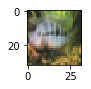

In [6]:
#Visualizing CIFAR 10
fig, axes1 = plt.subplots(figsize=(1, 1))
axes1.imshow(train_reshaped[0], interpolation='none')

In [7]:
import numexpr as ne
a = np.arange(1000000)
ne.evaluate('sin(a)')

array([ 0.        ,  0.84147098,  0.90929743, ...,  0.21429647,
       -0.70613761, -0.97735203])

In [8]:
%timeit range(100)

187 ns ± 4.49 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
